# <b>Linear Regression</b> (sau Regresia Liniară)

![Grafic](figs/linreg.png "Regresie Liniara")

Aproximeaza un trend de date, printr-o dreapta, functie de gradul I. 
$$
y(x_{1}, x_{2}, ...,x_{k}) = b + w_{1}x_{1} + w_{2}x_{2} + ... + w_{k}x_{k} + \epsilon
$$
* $x_{i}$ - variabilele independente, caracteristicile date in problema care sunt corelate in rezultat
* $y$ - variabila dependenta, care este rezultatul problemei de regresie
* $w_{i}$ - (weights) coeficientii care descriu impactul fiecarei variabile -> care variabila are cea mai mare importanta
* $b$ - (bais) tendinta sistemului de a fi, fara vre-un impact al unei caracteristici.

### Invatarea parametrilor $w_{i}$ si $b$: **Gradient Descent**
Pentru a obtine modelul matematic al trendului de date, se urmareste reglarea parametrilor $w_{i}$ si $b$, in asa fel incat pierderea $L$, numita si deviatie sau eroare, sa fie minima!

Daca,
$$
\hat{y_{i}} = b + w_{1i}x_{1i} + w_{2i}x_{2i} + ... + w_{ki}x_{ki} + \epsilon_{i}
$$
este aproximarea unui punct din setul de date, atunci putem defini functia de pierdere $L(W, b)$, ca suma medie tuturor patratelor diferentelor dintre valoarea propriu-zisa $y_{i}$, si valoarea aproximata $\hat{y}_{i}$.
$$
L(W, b) = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y_{i}})^{2}\\
L(W, b) = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - (b + WX_{i}))^{2}
$$

Scopul nostru acum este de a minimiza functia de pierdere. In acest sens, se considera gradientul acestei functii, care depinde de coeficientii $w_{i}$ si $b$ ai fiecarui data-point.
$$
\nabla L(W, b) = \begin{bmatrix}
\frac{\partial L}{\partial W} \\
\\
\frac{\partial L}{\partial b}
\end{bmatrix}
$$
Notam astfel cele 2 derivate partiale in raport cu weights-urile (W) si bias-ul (b):
$$
dW=\frac{\partial L}{\partial W} = \frac{1}{N}\sum_{i=1}^{N}-2X_{i}(y_{i} - (WX_{i}+b)) = \boxed{\frac{2}{N}\sum_{i=1}^{N}X_{i}(\hat{y} - y_{i})}
\\
db=\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}-2(y_{i} - (WX_{i}+b)) = \boxed{\frac{2}{N}\sum_{i=1}^{N}2(\hat{y} - y_{i})}
$$

Invatarea parametrilor $W$ si $b$, se realizeaza iterativ, urmarind reducerea acestora lor, raportata la directia pe care o da gradientul functiei de pierdere.
$$
W=W-\alpha\cdot dW\\
b=b-\alpha\cdot db
$$
$\alpha$ reprezinta rata de invatare, care indica granularitatea si pasul in care functia se apropie de valoarea sa minima. $\alpha$ se alege de regula ca fiind o valoare foarte mica, precum 0.001.

### **Algoritmul de antrenare**!
* initializam $W$ cu 0.
* initializam $b$ cu 0.
* pentru fiecare data point
    * se prezice $\hat{y}_{i}=WX_{i}+b$
    * calculam eroarea
    * coborare in gradient, actualizand $W$ si $b$.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


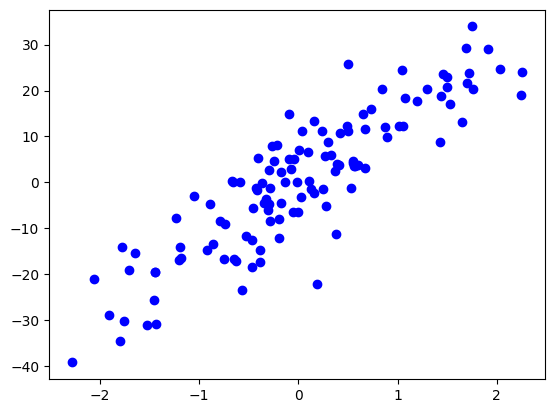

In [2]:
X, y = datasets.make_regression(n_samples=120, n_features=1, noise=7, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:, 0], y, color='b', marker='o')
plt.show()

In [3]:
from linear_regression import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [4]:
def MSE(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)

print(MSE(y_test, y_pred))

55.533167031931804


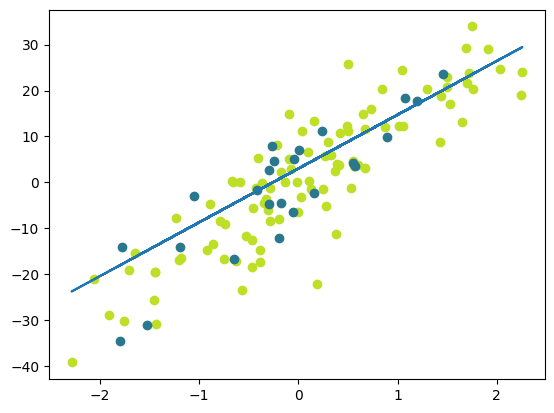

In [5]:
cmap = plt.get_cmap('viridis')
plt.scatter(X_train, y_train, color=cmap(0.9))
plt.scatter(X_test, y_test, color=cmap(0.4))

y_pred = linreg.predict(X)
plt.plot(X, y_pred)

plt.show()